In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.8.0


In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= fashion_mnist.load_data()

In [4]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

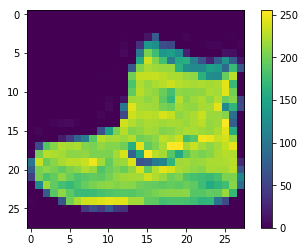

In [7]:
plt.figure()
plt.imshow(train_images[0])#plt.imshow是用来绘制热图的，不是用来显示图片的
plt.colorbar()
plt.grid(False)# 不显示网格线
plt.show()#真正显示图片的

In [7]:
train_images = train_images/255.0
test_images=test_images/255.0

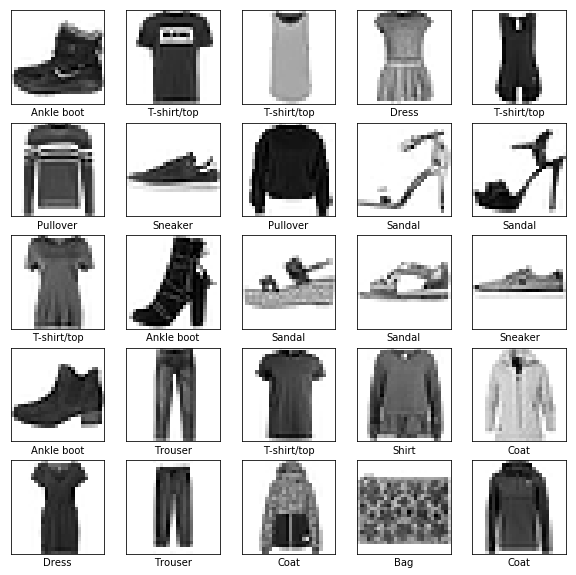

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])#ticks记号，xticks表示x轴的记号，比如plt.xticks([a,b,c]),x轴则显示a,b,c等间距文本
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)#cmap:colormap
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.4939 - acc: 0.8262
Epoch 2/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.3733 - acc: 0.8650
Epoch 3/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.3348 - acc: 0.8779
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3115 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.2909 - acc: 0.8929


In [12]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("Test accuracy:",test_acc)

10000/10000 [==============================] - 0s 39us/step
Test accuracy: 0.8811


In [13]:
predictions=model.predict(test_images)

In [14]:
predictions[0]

array([  5.22437876e-05,   1.56057649e-05,   9.69667553e-07,
         6.33522461e-08,   1.62420042e-06,   1.00609072e-01,
         2.38211524e-05,   5.18533699e-02,   3.43236141e-04,
         8.47100019e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

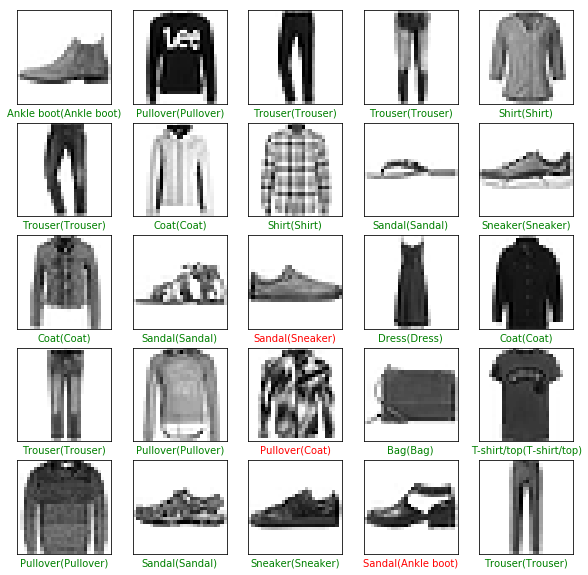

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions[i])
    true_label=test_labels[i]
    if predicted_label==true_label:
        color='green'
    else:
        color='red'
    plt.xlabel("{}({})".format(class_names[predicted_label],class_names[true_label]),color=color)
plt.show()

In [20]:
img=test_images[0]
print(img.shape)
img=(np.expand_dims(img,0))
print(img.shape)

(28, 28)
(1, 28, 28)


In [21]:
predictions_single=model.predict(img)
print(predictions_single)

[[  5.22438349e-05   1.56057777e-05   9.69667440e-07   6.33523598e-08
    1.62420190e-06   1.00609183e-01   2.38211742e-05   5.18533289e-02
    3.43236141e-04   8.47099960e-01]]
